In [1]:
from skimage.util import img_as_float
from skimage import io, util, color
from skimage.color import rgb2gray, gray2rgb, rgb2hsv
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage import data

# Filtering using Python

scikit-image and SciPy contain a large number of image filtering functions. In this exercise, we will explore some of the fundamental functions and touch upon more advanced filters as well.

## Filtering using correlation

We will start by exploring the basic correlation operator from SciPy. Start by importing:
Now create a small and simple image
 and a simple filter:

In [2]:
from scipy.ndimage import correlate
input_img = np.arange(25).reshape(5, 5)
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Now we can correlate the image with the weights:

In [3]:
res_img = correlate(input_img, weights)
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Exercise 1

Print the value in position (3, 3) in `res_img`. Explain the value?

In [4]:
print(res_img[2][2])

72


The value is the dot product between the weight and the the image --> 72

## Border handling 


When the value of an output pixel at the boundary of the image is
computed, a portion of the filter is usually outside the edge of the
input image. One way to handle this, is to assume that the value of the
  *off-the-edge pixels* of the image are 0. This is called zero
padding. Since 0 is the value of a black pixel, the output image will
have a dark edge. Another approach is to *reflect* the actual pixel values of the image to the *off-the-edge-pixel*. This is the default behaviour of `correlate`. We can also set the *off-the-edge-pixel* to have a constant value (for example 10) by:

In [5]:
res_img = correlate(input_img, weights, mode="constant", cval=10)
res_img_refl = correlate(input_img, weights, mode="reflect")
print(res_img)
print(res_img_refl)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Exercise 2

Compare the output images when using `reflection` and `constant` for the border. Where and why do you see the differences.

The constant method is fucked up


## Mean filtering

Now we will try some filters on an artificial image with different types of noise starting with the mean filter. 
### Exercise 3

Read and show the image **Gaussian.png** from the [exercise material](https://github.com/RasmusRPaulsen/DTUImageAnalysis/blob/main/exercises/ex4-ImageFiltering/data/).

Create a mean filter with normalized weights:

(450, 450)


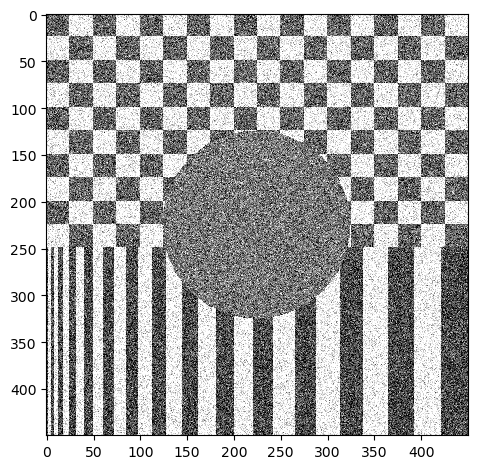

In [6]:
image = io.imread("Gaussian.png")
im_gray = color.rgb2gray(image)
io.imshow(im_gray)
print(im_gray.shape)
size = 60
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

Use `correlate` with the **Gaussian.png** image and the mean filter. Show the resulting image together with the input image. What do you observe?

Try to change the size of the filter to 10, 20, 40 etc.. What do you see?

-More the size is high, more the image is blurred

What happens to the noise and what happens to the places in image where there are transitions from light to dark areas?


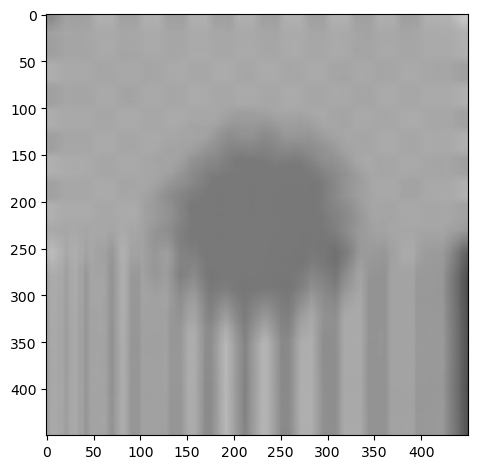

In [7]:
corr_image = correlate(im_gray, weights)
io.imshow(corr_image)

## Median filtering

The median filter belongs to the group of *rank filters* where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values.

Start by importing the filter:


In [8]:
from skimage.filters import median

We can create a *footprint* which marks the size of the median filter and do the filtering like this:

In [9]:
size = 20
footprint = np.ones([size, size])
med_img = median(im_gray, footprint)

### Exercise 4

Filter the **Gaussian.png** image with the median filter with different size (5, 10, 20...). What do you observe? What happens with the noise and with the lighth-dark transitions?


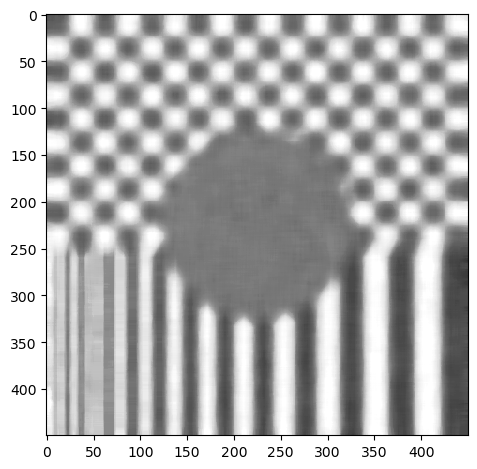

In [10]:
io.imshow(med_img)

## Comparing mean and median filtering

Try to load and show the **SaltPepper.png** image. This image has noise consist of very dark or very light pixels.
### Exercise 5

Try to use your mean and median filter with different filter sizes on the **SaltPepper.png**. What do you observe? Can they remove the noise and what happens to the image?

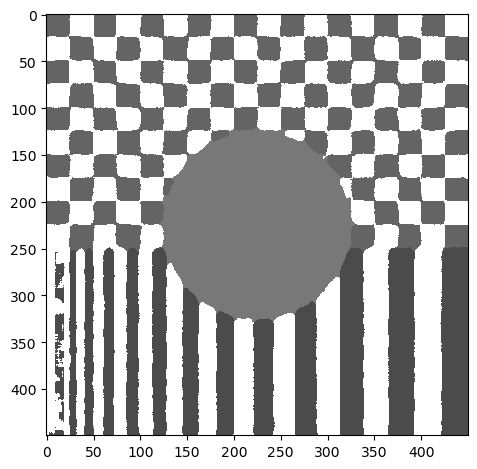

In [11]:
salt = io.imread("SaltPepper.png")
im_gray = color.rgb2gray(salt)

size = 10
weights = np.ones([size, size])
footprint = np.ones([size, size])
weights = weights / np.sum(weights)
mean = correlate(im_gray, weights)

salt_median = median(im_gray, footprint)


io.imshow(salt_median)



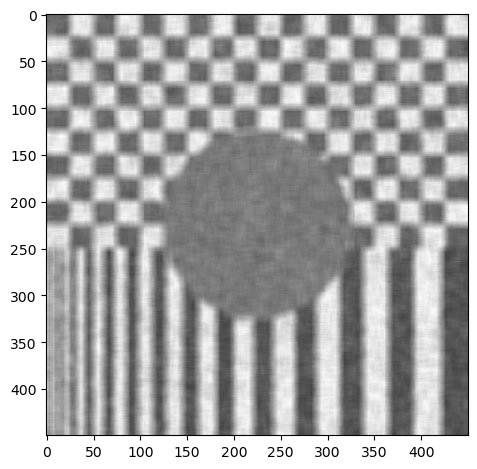

In [12]:
io.imshow(mean)

## Gaussian filter

Scikit-image contains many [different filters](https://scikit-image.org/docs/stable/api/skimage.filters.html).

The Gaussian filter is widely used in image processing. It is a
smoothing filter that removes high frequencies from the image.


### Exercise 6
Let us try the Gaussian filter on the **Gaussian.png** image. Start by importing the filter:


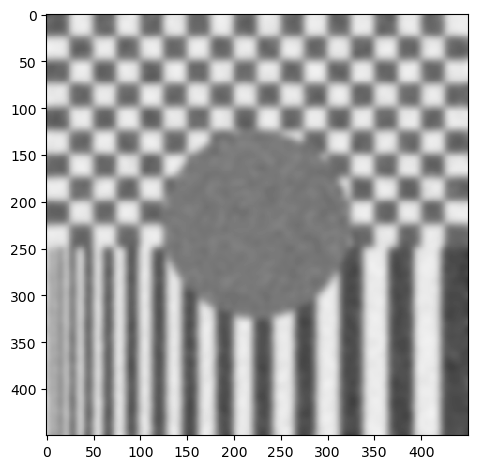

In [13]:
from skimage.filters import gaussian
sigma = 4
img_gaussian = io.imread("Gaussian.png")
im_org = color.rgb2gray(img_gaussian)
gauss_img = gaussian(im_org, sigma)

io.imshow(gauss_img)

### Exercise 7

Use one of your images (or use the **car.png** image) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median and the Gaussian filter. Remember to transform your image into gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

## Edge filters

In image analysis, an *edge* is where there is a large transition from light pixels to dark pixels. It means that there is a *high pixel value gradient* at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. It is therefore interesting to apply filters that can estimate the gradients in the image and using them to detect edges. The **Prewitt filter** is a simple gradient estimation filter. The Python version of the Prewitt filter can estimate the horizontal gradient using the `prewitt_h` filter, the vertical gradient with the `prewitt_v` filter and the *magnitude of the edges* using the `prewitt` filter. The magnitude is computed as

$$V(x, y) = \sqrt{(P_v^2 + P_h^2)} \enspace , $$

where $P_v$ and $P_h$ are the outputs of the vertical and horizontal Prewitt filters.

Start by importing the filter:

In [14]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

### Exercise 8

Try to filter the **donald_1.png** photo with the `prewitt_h` and `prewitt_v` filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

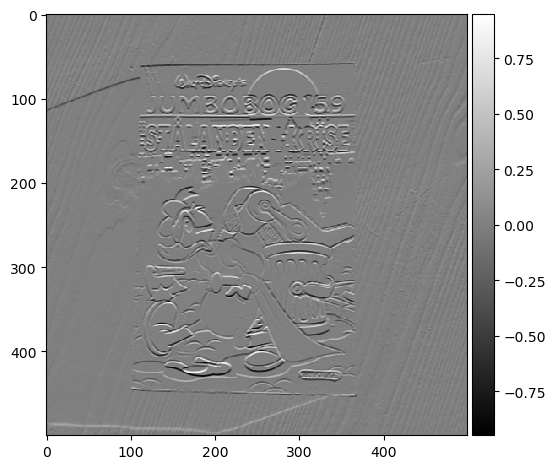

In [15]:
donald= io.imread("donald_1.png")
im_gray_donald= color.rgb2gray(donald)

prewitt_donald = prewitt_h(im_gray_donald)
io.imshow(prewitt_donald, cmap="gray")


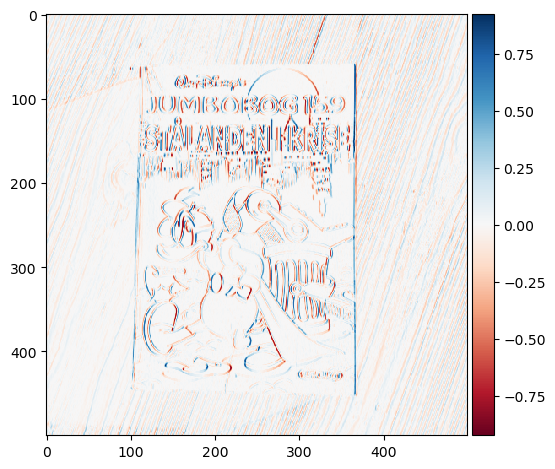

In [16]:
prewitt_v_donald = prewitt_v(im_gray_donald)
io.imshow(prewitt_v_donald)


### Exercise 9

Use the `prewitt` filter on **donald_1.png**. What do you see?

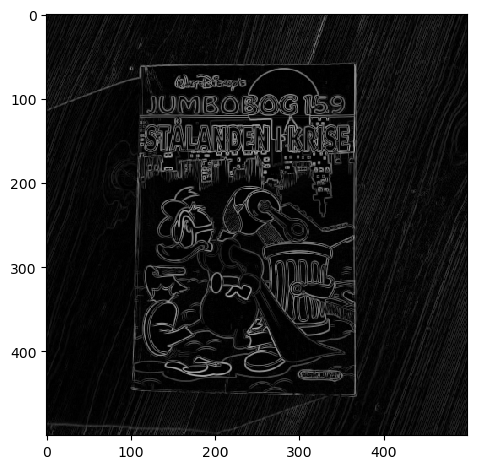

In [17]:
prewitt_donald = prewitt(im_gray_donald)
io.imshow(prewitt_donald)


## Edge detection in medical images

The **ElbowCTSlice.png** image is one slice of a CT scan of an elbow from a person that climbed, wanted to show off, fell, landed on his arm and fractured a bone.

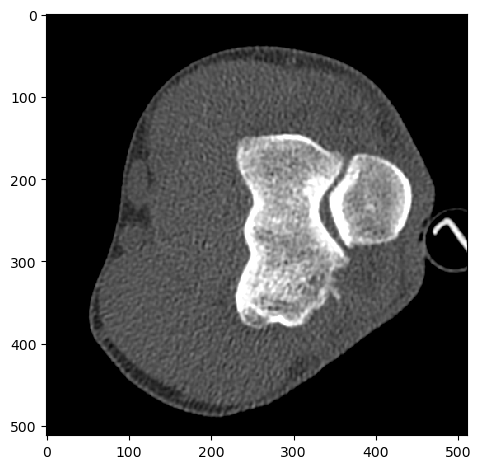

In [18]:
elbow = io.imread("ElbowCTSlice.png")
im_gray_elbow= color.rgb2gray(elbow)
io.imshow(im_gray_elbow)

### Exercise 10

The goal of this exercise is to detect the edges that seperates the bone from the soft 
tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

- Read the CT image
- Filter the image using either a Gaussian filter or a median filter
- Compute the gradients in the filtered image using a Prewitt filter
- Use Otsu's thresholding method to compute a threshold, T,  in the gradient image
- Apply the threshold, T, to the gradient image to create a binary image.

The final binary should contain the edges we are looking for. It will probably contain noise as well. We will explore methods to remove this noise later in the course.

You should experiment and find out:

- Does the median or Gaussian filter give the best result?
- Should you use both the median and the Gaussian filter?
- What filter size gives the best result?
- What sigma in the Gaussian filter gives the best result?

**Tip:** To get a better understanding of your output, uou can use the scaled visualization and colormapping that we explored in an earlier exercise:

c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


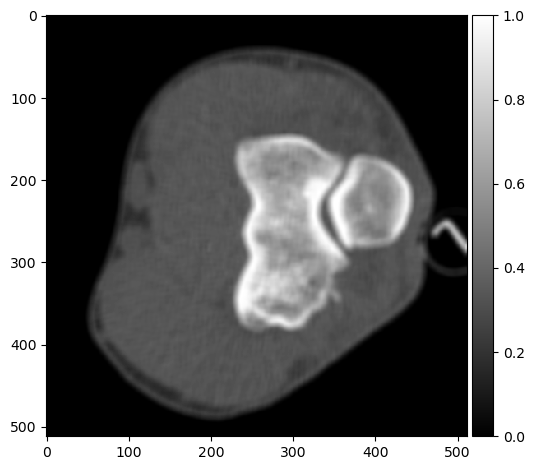

In [19]:
#- Filter the image using either a Gaussian filter or a median filter

size = 10
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

mean_elbow = correlate(im_gray_elbow, weights)
io.imshow(mean_elbow, cmap = "gray")

c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


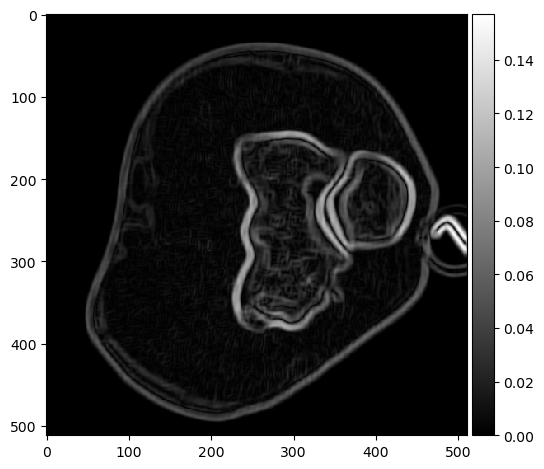

In [20]:
#- Compute the gradients in the filtered image using a Prewitt filter
prewitt_elbow= prewitt(mean_elbow)

io.imshow(prewitt_elbow, cmap="gray")

In [21]:
#- Use Otsu's thresholding method to compute a threshold, T,  in the gradient image
from skimage.filters import threshold_otsu
threshold_value = threshold_otsu(prewitt_elbow)

print(threshold_value)

0.027912340426149828


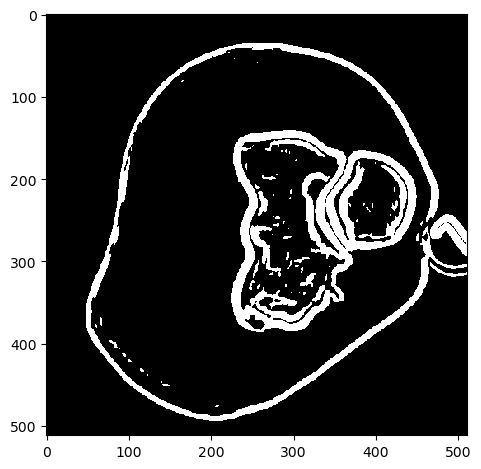

In [22]:
#- Apply the threshold, T, to the gradient image to create a binary image.
img_thresholded = prewitt_elbow >= threshold_value

io.imshow(img_thresholded)


## Differences between `matplotlib.pyplot.imshow()` and `skimage.io.imshow()` 
You should also be aware of the differences in the default behaviour between scikit-image and matplotlib when displaying an image. The default behaviour of matplotlib.pyplot.imshow() is to use the dynamic range of the image values to plot the image. It is, if the image intensities range from [26, 173], the black colour is assigned to 26 and the white to 173. Meanwhile, skimage.io.imshow() displays the dynamic range according to the image type, [0, 255] for integer images and [0., 1.] for float images.

Feel free to use either package, as far as you know what you are doing.